In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quora = pd.read_csv('../data/.input/train.csv')

In [3]:
quora.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [4]:
quora_train, quora_test = train_test_split(quora, random_state=42)
quora_train_data = quora_train.question_text
quora_train_labels = quora_train.target * 2.0 - 1.0
quora_test_data = quora_test.question_text
quora_test_labels = quora_test.target * 2.0 - 1.0

In [5]:
def to_vw_format(document, label=None):
    return str(label or '') + ' |text ' + ' '.join(re.findall('\w{3,}', document.lower())) + '\n'

In [6]:
!!mkdir .input
with open('.input/train.vw', 'w', encoding='utf-8') as vw_train_data:
    for text, target in zip(quora_train_data, quora_train_labels):
        vw_train_data.write(to_vw_format(text, target))
with open('.input/test.vw', 'w', encoding='utf-8') as vw_test_data:
    for text in quora_test_data:
        vw_test_data.write(to_vw_format(text))

In [7]:
!!vw -d .input/train.vw --loss_function hinge -f .input/model.vw

['final_regressor = .input/model.vw',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'using no cache',
 'Reading datafile = .input/train.vw',
 'num sources = 1',
 'average  since         example        example  current  current  current',
 'loss     last          counter         weight    label  predict features',
 '1.000000 1.000000            1            1.0  -1.0000   0.0000       15',
 '0.933333 0.866667            2            2.0  -1.0000  -0.1333        6',
 '0.740187 0.547040            4            4.0  -1.0000  -0.6635        8',
 '0.539190 0.338194            8            8.0  -1.0000  -0.6889       16',
 '0.506653 0.474115           16           16.0  -1.0000  -0.8192       10',
 '0.348824 0.190995           32           32.0  -1.0000  -1.0000        6',
 '0.258849 0.168873           64           64.0  -1.0000  -0.6118        6',
 '0.208719 0.158590          128          128.0  -1.0000  -1.0000        6',
 '0.204097 0.199475          

In [8]:
!!vw -i .input/model.vw -t -d .input/test.vw -p .input/test_predictions.txt

['only testing',
 'predictions = .input/test_predictions.txt',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'using no cache',
 'Reading datafile = .input/test.vw',
 'num sources = 1',
 'average  since         example        example  current  current  current',
 'loss     last          counter         weight    label  predict features',
 '    n.a.     n.a.            1            1.0  unknown  -1.0000       13',
 '    n.a.     n.a.            2            2.0  unknown  -1.0000        9',
 '    n.a.     n.a.            4            4.0  unknown  -1.0000       11',
 '    n.a.     n.a.            8            8.0  unknown  -1.0000       11',
 '    n.a.     n.a.           16           16.0  unknown  -1.0000        8',
 '    n.a.     n.a.           32           32.0  unknown  -1.0000        8',
 '    n.a.     n.a.           64           64.0  unknown  -1.0000       11',
 '    n.a.     n.a.          128          128.0  unknown  -1.0000       13',
 '   

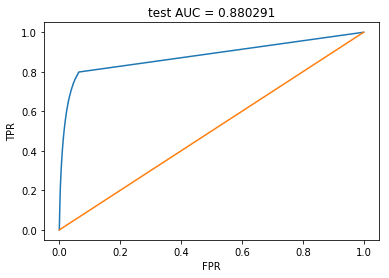

In [9]:
with open('.input/test_predictions.txt') as pred_file:
    quora_test_prediction = [float(label) 
                             for label in pred_file.readlines()]

auc = roc_auc_score(quora_test_labels, quora_test_prediction)
curve = roc_curve(quora_test_labels, quora_test_prediction)


plt.plot(curve[0], curve[1]);
plt.plot([0,1], [0,1])
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);


In [10]:
quora_test_pred = list(map(lambda x: -1.0 if x < 0 else 1.0, quora_test_prediction))
print('accuracy', accuracy_score(quora_test_labels, quora_test_pred))
print('precision', precision_score(quora_test_labels, quora_test_pred))
print('recall', recall_score(quora_test_labels, quora_test_pred))
print('f1', f1_score(quora_test_labels, quora_test_pred))
confusion_matrix(quora_test_labels, list(map(lambda x: -1.0 if x < 0 else 1.0, quora_test_prediction)))

accuracy 0.9533673678762506
precision 0.7357414448669202
recall 0.36877476302723305
f1 0.49129723048140844


array([[303951,   2641],
       [ 12586,   7353]], dtype=int64)